In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Statistical Significance and p-Values

- Statistical Significance

Statistical significance is how statisticians measure whether an experiment (or even a study of existing data) yields a result more extreme than what chance might produce.

- p-value

Given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining results as unusual or extreme as the observed results. The p-value is used for deciding the Statistical Significance of

example: Lets condiser the observe difference equal to 1.0. Out of 1000 resampling process, we are getting difference 100 times more than observed difference. Hence, the p-value is 0.1 (100/1000).  

- Alpha

The probability threshold of “unusualness” that chance results must surpass for
actual outcomes to be deemed statistically significant. 

Example: alpha=0.05, if p-value > alpha, the difference is not statistically significant else the difference is statistically significant.  

- Type 1 error

Mistakenly concluding an effect is real (when it is due to chance).

- Type 2 error

Mistakenly concluding an effect is due to chance (when it is real).

# Example

Table for ecommerce experiment results

Outcome      |   Price A   |   Price B 
-------------|-------------|-------------
Conversion   |      200    |     182
No Conversion|     23539   |    22406

In [3]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    sum_a=(x.loc[list(idx_A)]).sum()/nA
    sum_b=(x.loc[list(idx_B)]).sum()/nB
    return (sum_a-sum_b)*100

In [4]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

#conversion
perm_diffs = [100 * perm_fun(conversion, 23739, 22588) for _ in range(1000)]


Observed difference: 0.0368%


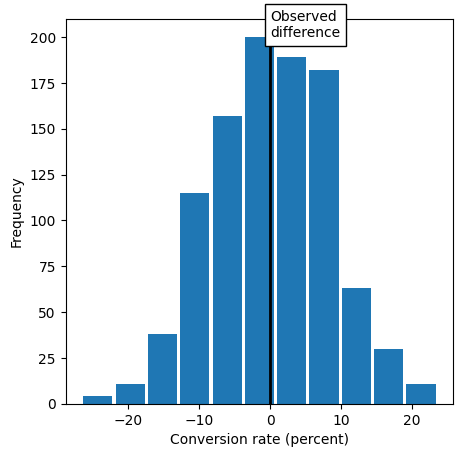

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')
plt.show()

In [6]:
tmp=[diff > obs_pct_diff for diff in perm_diffs]
np.mean(tmp)
#tmp

0.513

In [7]:
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)
print(chi2)
print(p_value/2)
print(df)

0.14893055235461503
0.34977973135733076
1


# t-Tests

- Test statistic

A metric for the difference or effect of interest.

- t-statistic

A standardized version of common test statistics such as means.

$t-value=\frac{|m_1-m_2|}{\sqrt{\frac{s_1^2}{n1}+\frac{s_2^2}{n2}}}$

$m_1$ = Mean value of group 1,
$m_2$ = Mean value of group 2,
$s_1$ = Standard Deviation of group 1,
$s_2$ = Standard Deviation of group 2,
$n_1$ = Number of observations in group 1,
$n_2$ = Number of observations in group 2

- t-distribution

A reference distribution (in this case derived from the null hypothesis), to which
the observed t-statistic can be compared.

In [8]:
# Data
filepath="/content/drive/MyDrive/Data Science/data/Class-12/web_page_data.csv"
data=pd.read_csv(filepath)
data

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67
5,Page B,0.85
6,Page A,2.11
7,Page B,2.46
8,Page A,1.32
9,Page B,1.49


In [9]:
# Student's t- Test
res = stats.ttest_ind(data[data.Page == 'Page A'].Time,data[data.Page == 'Page B'].Time,equal_var=False)
print(f't-value : {res.statistic:.4f}')
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

t-value : -1.0983
p-value for single sided test: 0.1408


# Should be reject the null hypothesis?

We should not reject the null hypothes because the p-value is very higher than than the alpha (i.e. 0.05). 

#Example-2

In [10]:
filepath="/content/drive/MyDrive/Data Science/data/Class-12/click_rates.csv"
clicks=pd.read_csv(filepath)
clicks=clicks.pivot_table(columns="Headline", index="Click")
clicks.columns=clicks.columns.droplevel()
clicks

Headline,Headline A,Headline B,Headline C
Click,,,
Click,14,8,12
No-click,986,992,988


# How click rate differe compared to expected click rate?

Null Hypothesis:

Observed clicks are not different than the expected click rate

In [11]:
clicks2=1*clicks
clicks2.loc["Click"]=clicks.loc["Click"].mean()
clicks2.loc["No-click"]=clicks.loc["No-click"].mean()
clicks2

Headline,Headline A,Headline B,Headline C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


# Chi-Sqaure test

- Pearson residual

$R=\frac{Observed-Expected}{\sqrt{Expected}}$

- Chi-square statistic

$\chi = \sum_{i}^{r} \sum_{j}^{c} R^2_{ij}$

$r=$ number of rows, 
$c=$ number of columns

In [12]:
# Prepare the data
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)
#box

In [13]:
# Calculate the Chi- statistic

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        tmp=[]
        for observe in row:
            R=(observe - expect) ** 2 / expect
            tmp.append(R)
        pearson_residuals.append(tmp)
    #print(pearson_residuals)
    X=np.sum(pearson_residuals)
    #print(X)
    return X

In [14]:
expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [expected_clicks, expected_noclicks]
chi2observed = chi2(clicks.values, expected)

print(f'Observed chi2: {chi2observed:.4f}')

Observed chi2: 1.6659


In [15]:
def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),sum(random.sample(box, 1000)),sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected) 

perm_chi2 = [perm_fun(box) for _ in range(2000)]
#perm_chi2
resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Resampled p-value: {resampled_p_value:.4f}')

Resampled p-value: 0.4955


#Conclusion:

The null hypothesis can't be rejected because it p-value is greated than the alpha (=0.05)

# Chi-Square Test: Statistical Theory

Steps-1 : Calculate degree of freedom

degrees of freedom = $(r − 1) \times (c − 1)$

Steps-2 : Calculate Chi-square statistic ($\chi$)

Step-3 : Find out p-value corresponds to DoF and $\chi$ from chi-square distribution table (See the PDF)

In [16]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'p-value: {pvalue:.4f}')
print(df)
print(expected)

Observed chi2: 1.6659
p-value: 0.4348
2
[[ 11.33333333  11.33333333  11.33333333]
 [988.66666667 988.66666667 988.66666667]]


# Visualization

https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html

<Axes: ylabel='Count'>

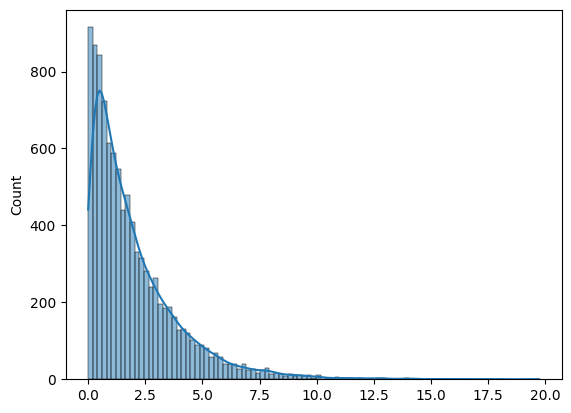

In [18]:
df=2
chi_data = stats.chi2.rvs(df, size=10000)
sns.histplot(chi_data,kde=True)

In [20]:
datafile="/content/drive/MyDrive/Data Science/data/Class-12/IPL_Auction_2022_FullList.csv"
data=pd.read_csv(datafile)
data

,Set No.,Set Name,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL,Previous IPLTeam(s),2021 Team,C/U/A,Base Price,Sold Price,New Franchise,Bid
0,1,M,Trent Boult,New Zealand,NaN,32,BOWLER,RHB,LEFT ARM Fast Medium,62.0,"SRH, KKR, DD,MI",MI,Capped,200,8 CR,Rajasthan Royals,Sold
1,1,M,Pat Cummins,Australia,NaN,28,ALL-ROUNDER,RHB,RIGHT ARM Fast,37.0,"DD, MI, KKR",KKR,Capped,200,7.25 CR,Kolkata Knight Riders,Sold
2,1,M,Shikhar Dhawan,India,DDCA,36,BATSMAN,LHB,-,192.0,"DCH, MI, SRH, DC",DC,Capped,200,8.25 CR,Punjab Kings,Sold
3,1,M,Shreyas Iyer,India,MCA,27,BATSMAN,RHB,RIGHT ARM Leg Spin,87.0,DC,DC,Capped,200,12.25 CR,Kolkata Knight Riders,Sold
4,1,M,Kagiso Rabada,South Africa,NaN,26,BOWLER,LHB,RIGHT ARM Fast,50.0,DC,DC,Capped,200,9.25 CR,Punjab Kings,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,62,UAL15,Safyaan Sharif,Scotland,NaN,30,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,NaN,Associate,20,NaN,NaN,UnSold
585,62,UAL15,Henry Shipley,New Zealand,NaN,25,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,NaN,Uncapped,20,NaN,NaN,UnSold
586,62,UAL15,Maxwell Swaminathan,India,MCA,23,ALL-ROUNDER,RHB,RIGHT ARM Off Spin,NaN,NaN,NaN,Uncapped,20,NaN,NaN,UnSold
587,62,UAL15,Johan Van Dyk,South Africa,NaN,28,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,NaN,NaN,NaN,Uncapped,20,NaN,NaN,UnSold


In [21]:
data3=pd.crosstab(data['Specialism'],data["Batting"],margins=False)
data3

Batting,LHB,RHB
Specialism,,
ALL-ROUNDER,75,152
BATSMAN,36,66
BOWLER,50,152
WICKETKEEPER,13,45


In [22]:
chisq, pvalue, df, expected = stats.chi2_contingency(data3)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 6.5977
p-value: 0.0859


In [23]:
print(expected)

[[ 67.05942275 159.94057725]
 [ 30.13242784  71.86757216]
 [ 59.67402377 142.32597623]
 [ 17.13412564  40.86587436]]


In [24]:
# calculate to sum of columns
data3["column_sum"]=data3.sum(axis=1)
data3

Batting,LHB,RHB,column_sum
Specialism,,,
ALL-ROUNDER,75,152,227
BATSMAN,36,66,102
BOWLER,50,152,202
WICKETKEEPER,13,45,58


In [25]:
tmp=data3.sum(axis=0)
tmp2=pd.DataFrame({"LHB":tmp["LHB"],"RHB":tmp["RHB"],"column_sum":tmp["column_sum"]},index=["total"])
data3=data3.append(tmp2)
data3

<ipython-input-25-d5f88143dd6d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data3=data3.append(tmp2)


,LHB,RHB,column_sum
ALL-ROUNDER,75,152,227
BATSMAN,36,66,102
BOWLER,50,152,202
WICKETKEEPER,13,45,58
total,174,415,589


In [26]:
Expected_table=data3.iloc[0:4,0:2]
for r in range(4):
  for c in range(2):
    Expected_table.iloc[r,c]=data3.iloc[-1,c]*data3.iloc[r,-1]/data3.iloc[-1,-1]

Expected_table

,LHB,RHB
ALL-ROUNDER,67.059423,159.940577
BATSMAN,30.132428,71.867572
BOWLER,59.674024,142.325976
WICKETKEEPER,17.134126,40.865874
